In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk
import scipy as sp
import statsmodels as sm
from scipy.stats import zscore
import statsmodels.api as sma

In [2]:
copadf = pd.read_csv('../databases/WorldCupMatches.csv')

In [3]:
copadf = copadf.dropna()
copadf = copadf.iloc[:, [0, 6, 7]]
copadf['Total Goals'] = copadf['Home Team Goals'] + copadf['Away Team Goals']
copadf.head()

,Year,Home Team Goals,Away Team Goals,Total Goals
0,1930.0,4.0,1.0,5.0
1,1930.0,3.0,0.0,3.0
2,1930.0,2.0,1.0,3.0
3,1930.0,3.0,1.0,4.0
4,1930.0,1.0,0.0,1.0


In [4]:
copadf['Normalized Year'] = zscore(copadf['Year'])

In [5]:
copadf.head()

,Year,Home Team Goals,Away Team Goals,Total Goals,Normalized Year
0,1930.0,4.0,1.0,5.0,-2.454319
1,1930.0,3.0,0.0,3.0,-2.454319
2,1930.0,2.0,1.0,3.0,-2.454319
3,1930.0,3.0,1.0,4.0,-2.454319
4,1930.0,1.0,0.0,1.0,-2.454319


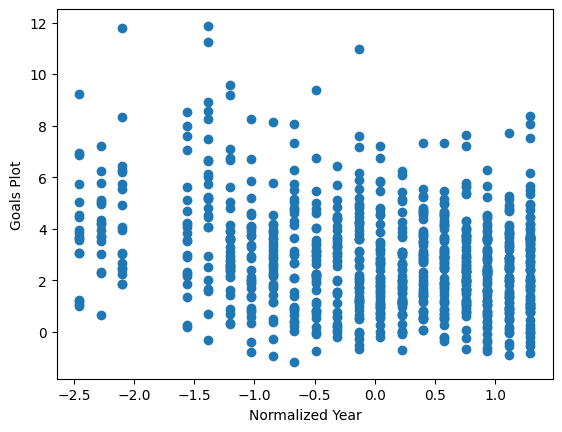

In [6]:
copadf['Goals Plot'] = copadf['Total Goals'] + np.random.normal(0, 0.5, copadf['Total Goals'].shape)

# Criação do gráfico de dispersão
plt.scatter(copadf['Normalized Year'], copadf['Goals Plot'])

# Definição dos títulos dos eixos
plt.xlabel('Normalized Year')
plt.ylabel('Goals Plot')

# Exibição do gráfico
plt.show()

<Axes: xlabel='Year'>

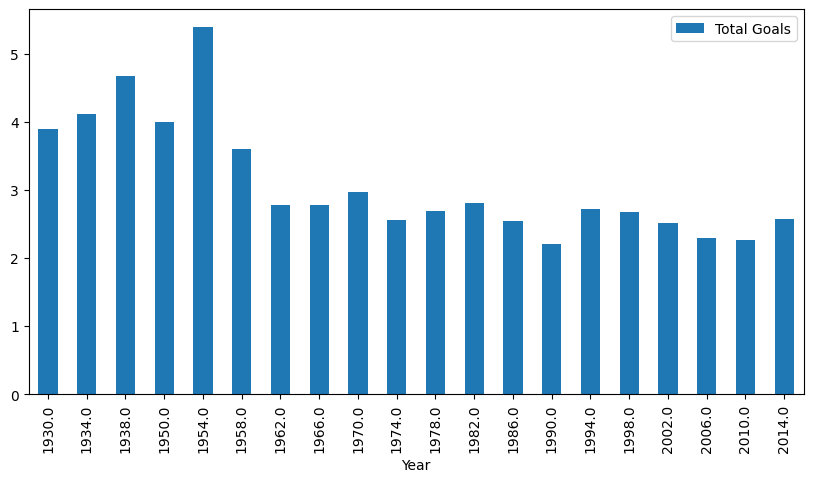

In [7]:
copadf.groupby('Year').mean().plot(kind='bar', y='Total Goals', figsize=(10, 5))

<Axes: xlabel='Year'>

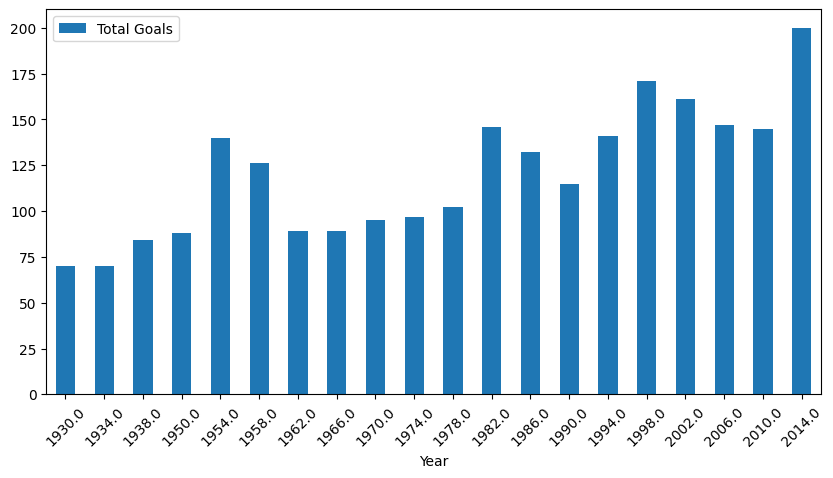

In [8]:
copadf.groupby('Year').sum().plot(kind='bar', y='Total Goals', figsize=(10, 5), rot=45)

<Axes: xlabel='Year'>

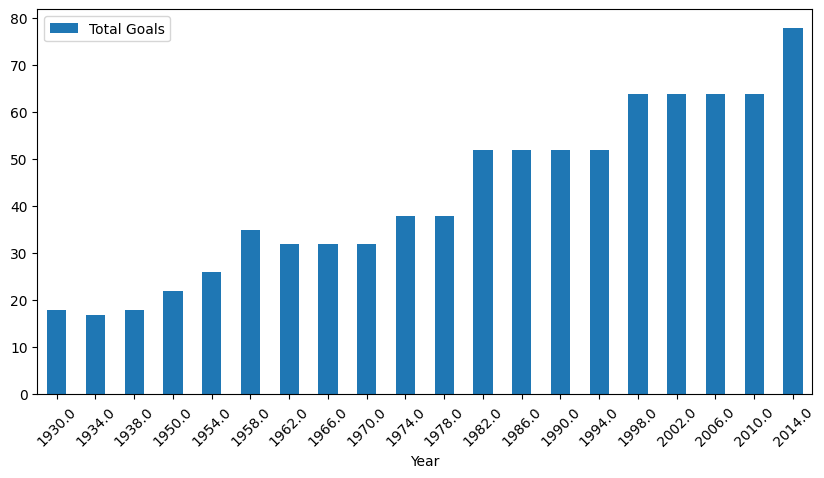

In [9]:
copadf.groupby('Year').count().plot(kind='bar', y='Total Goals', figsize=(10, 5), rot=45)

In [10]:
copadf['const'] = 1
model = sma.OLS(copadf['Total Goals'], copadf[['const', 'Normalized Year']])
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:            Total Goals   R-squared:                       0.075
Model:                            OLS   Adj. R-squared:                  0.073
Method:                 Least Squares   F-statistic:                     68.33
Date:                Mon, 04 Dec 2023   Prob (F-statistic):           5.32e-16
Time:                        22:12:43   Log-Likelihood:                -1743.2
No. Observations:                 850   AIC:                             3490.
Df Residuals:                     848   BIC:                             3500.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               2.8329      0.065     